In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ppercca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ppercca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
df = pd.read_csv('Reviews_Movies.csv', delimiter = '\t', quoting = 3)

In [8]:
df.shape

(25000, 2)

In [11]:
df.head()

,Review,Liked
0,bromwell high is a cartoon comedy . it ran at ...,1
1,story of a man who has unnatural feelings for ...,0
2,homelessness or houselessness as george carli...,1
3,airport starts as a brand new luxury pla...,0
4,brilliant over acting by lesley ann warren . ...,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
Review    25000 non-null object
Liked     25000 non-null int64
dtypes: int64(1), object(1)
memory usage: 390.7+ KB


In [10]:
df.describe()

,Liked
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [12]:
df['Number of Words'] = df['Review'].apply(word_tokenize).apply(len)
print(df.head())

                                              Review  Liked  Number of Words
0  bromwell high is a cartoon comedy . it ran at ...      1              167
1  story of a man who has unnatural feelings for ...      0              122
2  homelessness  or houselessness as george carli...      1              459
3  airport    starts as a brand new luxury    pla...      0              809
4  brilliant over  acting by lesley ann warren . ...      1              161


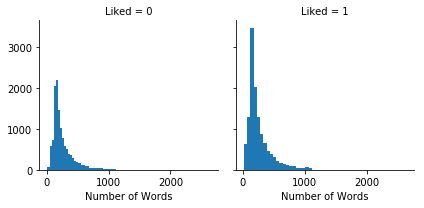

In [14]:
g = sns.FacetGrid(data=df, col='Liked')
g.map(plt.hist, 'Number of Words', bins=50)


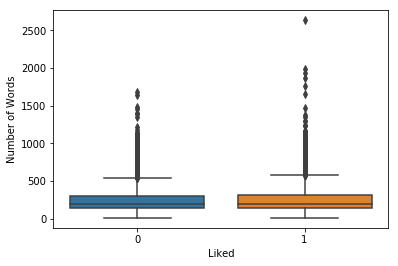

In [15]:
sns.boxplot(x='Liked', y='Number of Words', data=df)

In [18]:
filtered_reviews = []
tokened_reviews = []
reviews = []

In [22]:
for review in df["Review"]:
    reviews.append(review.rstrip().lower())
    stop_words = set(stopwords.words('english'))

for review in reviews:
    word_tokens = word_tokenize(review)
    tokened_reviews.append(word_tokens)
    filtered_review = [w for w in word_tokens if not w in stop_words]
    filtered_review = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_review.append(w)
    filtered_reviews.append(filtered_review)

In [23]:
sum_tokened_reviews = 0
sum_filtered_reviews = 0

for filtered_review in filtered_reviews:
    sum_filtered_reviews = sum_filtered_reviews + len(filtered_review)

print ("\n------------- Cantidad promedio de palabras por comentario: -------------")
print (df['Number of Words'].mean())

print ("\n------------- Cantidad promedio de palabras filtradas por comentario: -------------")
print (sum_filtered_reviews/len(filtered_reviews))



------------- Cantidad promedio de palabras por comentario: -------------
253.96104

------------- Cantidad promedio de palabras filtradas por comentario: -------------
136.6394
